> created by **Diffa**

github : [ddiffa](https://www.github.com/ddiffa)

linkedin : [Diffa Dwi](https://www.linkedin.com/in/diffadwi)

# **Load Dataset**

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-03 16:35:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.62MB/s    in 59s     

2020-05-03 16:36:32 (5.26 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# **Unzip File**

In [0]:
import os, zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# **Delete File**
I delete excess data and equate the amount of each data with the smallest amount of data

In [3]:
rock_directory = os.path.join('/tmp/rockpaperscissors/rock')
paper_directory = os.path.join('/tmp/rockpaperscissors/paper')
scissors_directory = os.path.join('/tmp/rockpaperscissors/scissors')


print('Total data rock images : ', len(os.listdir(rock_directory)))
print('Total data paper images : ', len(os.listdir(paper_directory)))
print('Total data scissors images : ', len(os.listdir(scissors_directory)))

Total data rock images :  726
Total data paper images :  712
Total data scissors images :  750


In [0]:
def deleteImages(directory,size,fileName):
  for i in range(size):
    if i > 711:
      os.remove(os.path.join(directory, fileName[i]))

In [0]:
rock_images = os.listdir(rock_directory)
paper_images = os.listdir(paper_directory)
scissors_images = os.listdir(scissors_directory)

deleteImages(rock_directory,len(os.listdir(rock_directory)),rock_images)
deleteImages(paper_directory,len(os.listdir(paper_directory)),paper_images)
deleteImages(scissors_directory,len(os.listdir(scissors_directory)),scissors_images)

print('Total data rock images : ', len(os.listdir(rock_directory)))
print('Total data paper images : ', len(os.listdir(paper_directory)))
print('Total data scissors images : ', len(os.listdir(scissors_directory)))

Total data rock images :  712
Total data paper images :  712
Total data scissors images :  712


delete unused folders

In [0]:
import shutil
shutil.rmtree(os.path.join('/tmp/rockpaperscissors/rps-cv-images'))

In [52]:
os.remove(os.path.join('/tmp/rockpaperscissors/','README_rpc-cv-images.txt'))
os.listdir('/tmp/rockpaperscissors/')

['paper', 'scissors', 'rock']

# **Data train & Validation**

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(validation_split = 0.25, 
                             rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [55]:
TRAINING_DIR = "/tmp/rockpaperscissors/"

train_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    subset='training',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    subset='validation',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 1602 images belonging to 3 classes.
Found 534 images belonging to 3 classes.


# **Create Model Machine Learning**

In [0]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax')
    
])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [0]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [0]:
model.compile(loss ='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Training time : 23:38 - 23.47 = 9 minutes


In [65]:
history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20,
                    validation_data = validation_generator,
                    verbose = 1,
                    validation_steps=3)

Epoch 1/25
20/20 [==============================] - 22s 1s/step - loss: 1.0755 - accuracy: 0.4134 - val_loss: 1.0049 - val_accuracy: 0.4947
Epoch 2/25
20/20 [==============================] - 21s 1s/step - loss: 0.9813 - accuracy: 0.5241 - val_loss: 0.9000 - val_accuracy: 0.6596
Epoch 3/25
20/20 [==============================] - 21s 1s/step - loss: 0.8516 - accuracy: 0.6465 - val_loss: 0.9585 - val_accuracy: 0.5106
Epoch 4/25
20/20 [==============================] - 21s 1s/step - loss: 0.7308 - accuracy: 0.7063 - val_loss: 0.8107 - val_accuracy: 0.6170
Epoch 5/25
20/20 [==============================] - 20s 1s/step - loss: 0.6631 - accuracy: 0.7402 - val_loss: 0.6263 - val_accuracy: 0.7302
Epoch 6/25
20/20 [==============================] - 21s 1s/step - loss: 0.5663 - accuracy: 0.7915 - val_loss: 0.6914 - val_accuracy: 0.7037
Epoch 7/25
20/20 [==============================] - 21s 1s/step - loss: 0.5226 - accuracy: 0.8043 - val_loss: 0.4756 - val_accuracy: 0.8191
Epoch 8/25
20/20 [==

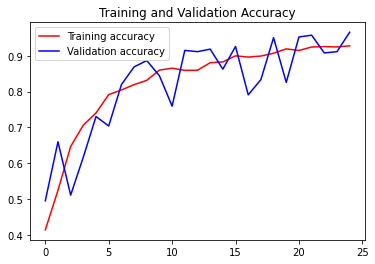

<Figure size 432x288 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# **Predict**

Saving 11.png to 11.png
11.png
[[1. 0. 0.]]
Predict : Paper


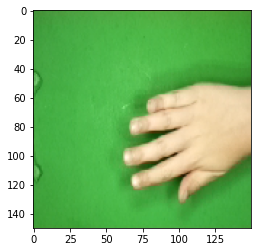

In [81]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  print(classes)
  if classes[0][0] == 1.0:
    print("Predict : Paper")
  elif classes[0][1] == 1.0:
    print("Predict : Rock")
  elif classes[0][2] == 1.0:
    print("Predict : Scissor")
  else :
    print("not detected")